In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
e0_25 = 'training_losses_epoch_0.json'
e25_50 = 'training_losses_epoch_25.json'
e50_75 = 'training_losses_epoch_50.json'
e75_80 = 'training_losses_epoch_75.json'

path = [
    f"C://Users//user//Desktop//UWE//Master's//Dissertation//{e0_25}", 
    f"C://Users//user//Desktop//UWE//Master's//Dissertation//{e25_50}"
    ]

In [3]:
log = dict({
    'epoch': [],
    'gen_g_loss': [],
    'gen_f_loss': [],
    'cycle_loss': [],
    'identity_loss_g': [],
    'identity_loss_f': [],
    'disc_x_loss': [],
    'disc_y_loss': []
})

In [4]:
for p in path:
    with open(p, "r") as file:
        content = json.load(file)

    epoch_data = []

    # Variables to accumulate losses and keep track of iterations
    iteration_counter = 0
    accumulated_losses = {
        'gen_g_loss': 0,
        'gen_f_loss': 0,
        'cycle_loss': 0,
        'identity_loss_g': 0,
        'identity_loss_f': 0,
        'disc_x_loss': 0,
        'disc_y_loss': 0
    }

    # Iterate over the content and accumulate the losses
    for i in range(len(content)):
        accumulated_losses['gen_g_loss'] += content[i]['gen_g_loss']
        accumulated_losses['gen_f_loss'] += content[i]['gen_f_loss']
        accumulated_losses['cycle_loss'] += content[i]['cycle_loss']
        accumulated_losses['identity_loss_g'] += content[i]['identity_loss_g']
        accumulated_losses['identity_loss_f'] += content[i]['identity_loss_f']
        accumulated_losses['disc_x_loss'] += content[i]['disc_x_loss']
        accumulated_losses['disc_y_loss'] += content[i]['disc_y_loss']
        
        # Increment the iteration counter
        iteration_counter += 1

        # Every 2000 iterations, calculate the average for the current epoch
        if iteration_counter == 2000:
            epoch = content[i]['epoch']
            
            # Append the averaged losses for this epoch
            epoch_data.append({
                'epoch': epoch,
                'gen_g_loss': accumulated_losses['gen_g_loss'] / 2000,
                'gen_f_loss': accumulated_losses['gen_f_loss'] / 2000,
                'cycle_loss': accumulated_losses['cycle_loss'] / 2000,
                'identity_loss_g': accumulated_losses['identity_loss_g'] / 2000,
                'identity_loss_f': accumulated_losses['identity_loss_f'] / 2000,
                'disc_x_loss': accumulated_losses['disc_x_loss'] / 2000,
                'disc_y_loss': accumulated_losses['disc_y_loss'] / 2000
            })

            # Reset the accumulated losses and iteration counter
            accumulated_losses = {key: 0 for key in accumulated_losses}
            iteration_counter = 0

    # Handle any remaining iterations at the end if the count is less than 2000
    if iteration_counter > 0:
        epoch = content[-1]['epoch']  # Use the last epoch for the remaining iterations
        
        # Append the averaged losses for this epoch
        epoch_data.append({
            'epoch': epoch,
            'gen_g_loss': accumulated_losses['gen_g_loss'] / iteration_counter,
            'gen_f_loss': accumulated_losses['gen_f_loss'] / iteration_counter,
            'cycle_loss': accumulated_losses['cycle_loss'] / iteration_counter,
            'identity_loss_g': accumulated_losses['identity_loss_g'] / iteration_counter,
            'identity_loss_f': accumulated_losses['identity_loss_f'] / iteration_counter,
            'disc_x_loss': accumulated_losses['disc_x_loss'] / iteration_counter,
            'disc_y_loss': accumulated_losses['disc_y_loss'] / iteration_counter
        })

    # Sort the epoch_data by 'epoch' in ascending order
    epoch_data.sort(key=lambda x: x['epoch'])

    # Fill the log with sorted epoch data
    for data in epoch_data:
        log['epoch'].append(data['epoch'])
        log['gen_g_loss'].append(data['gen_g_loss'])
        log['gen_f_loss'].append(data['gen_f_loss'])
        log['cycle_loss'].append(data['cycle_loss'])
        log['identity_loss_g'].append(data['identity_loss_g'])
        log['identity_loss_f'].append(data['identity_loss_f'])
        log['disc_x_loss'].append(data['disc_x_loss'])
        log['disc_y_loss'].append(data['disc_y_loss'])


In [5]:
len(log)

8

In [6]:
len(log['epoch'])

50

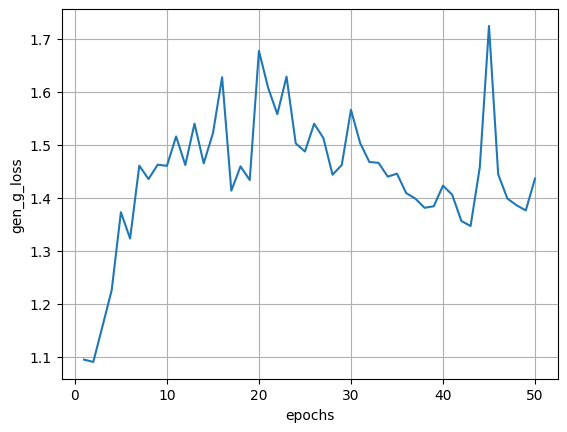

In [7]:
plt.plot(log['epoch'], log['gen_g_loss'])
plt.xlabel('epochs')
plt.ylabel('gen_g_loss')
plt.grid(True)
plt.show()

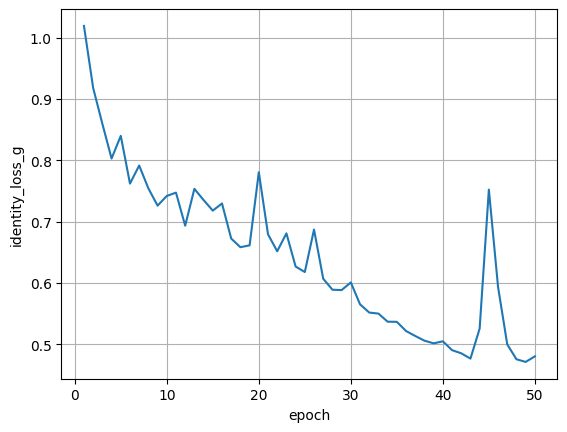

In [8]:
plt.plot(log['epoch'], log['identity_loss_g'])
plt.xlabel('epoch')
plt.ylabel('identity_loss_g')
plt.grid(True)
plt.show()

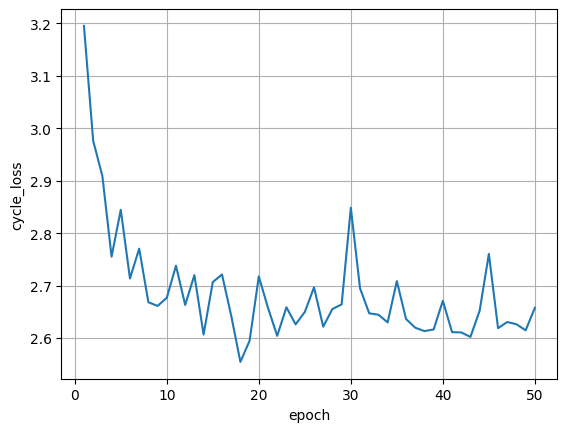

In [116]:
plt.plot(log['epoch'], log['cycle_loss'])
plt.xlabel('epoch')
plt.ylabel('cycle_loss')
plt.grid(True)
plt.show()

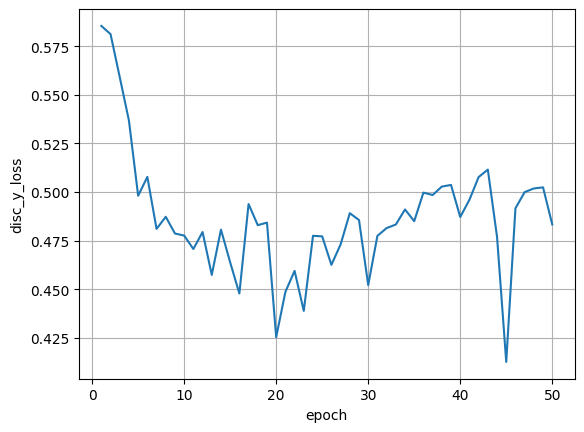

In [10]:
plt.plot(log['epoch'], log['disc_y_loss'])
plt.xlabel('epoch')
plt.ylabel('disc_y_loss')
plt.grid(True)
plt.show()